In [108]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

cd gdrive/My Drive/Colab Notebooks/models

In [114]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [110]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [111]:
print (train_images.shape)

(60000, 28, 28)


In [95]:
print (len(train_labels))

60000


In [96]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

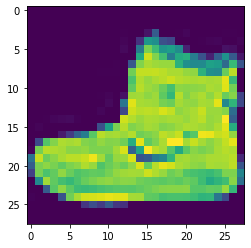

In [152]:
#plt.figure()
plt.imshow(train_images[0])
#plt.colorbar()
#plt.grid(False)
#plt.show()

In [153]:
train_images = train_images / 255.0
test_images = test_images / 255.0

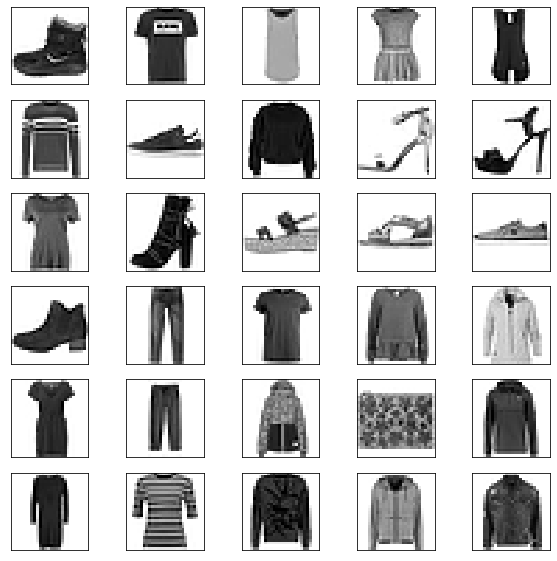

In [157]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [100]:
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])
'''

"\nmodel = keras.Sequential([\n    keras.layers.Flatten(input_shape=(28, 28)),\n    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),\n    keras.layers.Dense(10, activation='softmax')\n])\n"

In [101]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(28,28,1)),
    keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128, (2,2), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.Conv2D(128, (2,2), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(256, (2,2), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.Conv2D(256, (2,2), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(512, (2,2), activation='relu', kernel_initializer='he_normal', padding='same'),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 7, 7, 256)       

In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 소프트맥스에 맞물려 있는 것임. 여러개 중에 하나만 맞출때 사용함.
              metrics=['accuracy'])

## Callback 함수
- 

In [103]:
filepath = "./saved-model-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='max')

train_images = np.expand_dims(train_images, axis=0)
print(train_images.shape)

In [104]:
train_images = np.expand_dims(train_images, axis=-1)
print(train_images.shape)

(60000, 28, 28, 1)


In [105]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=5, shuffle=True, callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 27s 556us/step - loss: 0.4755 - accuracy: 0.8282 - val_loss: 0.2927 - val_accuracy: 0.8899

Epoch 00001: saving model to ./saved-model-01-0.29.hdf5
Epoch 2/5
48000/48000 [==============================] - 25s 531us/step - loss: 0.3005 - accuracy: 0.8902 - val_loss: 0.2663 - val_accuracy: 0.9024

Epoch 00002: saving model to ./saved-model-02-0.27.hdf5
Epoch 3/5
48000/48000 [==============================] - 26s 533us/step - loss: 0.2581 - accuracy: 0.9052 - val_loss: 0.2403 - val_accuracy: 0.9079

Epoch 00003: saving model to ./saved-model-03-0.24.hdf5
Epoch 4/5
48000/48000 [==============================] - 26s 532us/step - loss: 0.2356 - accuracy: 0.9129 - val_loss: 0.2530 - val_accuracy: 0.9047

Epoch 00004: saving model to ./saved-model-04-0.25.hdf5
Epoch 5/5
48000/48000 [==============================] - 26s 533us/step - loss: 0.2143 - accuracy: 0.9205 - val_loss: 0.2267 - val

In [115]:
test_images = np.expand_dims(test_images, axis=-1)
print(test_images.shape)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

(10000, 28, 28, 1)

테스트 정확도: 0.8409000039100647


Make Prediction

In [116]:
predictions = model.predict(test_images)

In [117]:
print (predictions[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [118]:
np.argmax(predictions[0])

9

In [119]:
test_labels[0]

9

In [161]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #print(img.shape)
    img = np.reshape(img,(img.shape[0:2]))
    print(img.shape)
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

(28, 28)


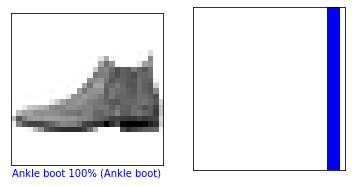

In [162]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

(28, 28)


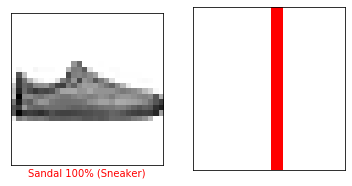

In [163]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


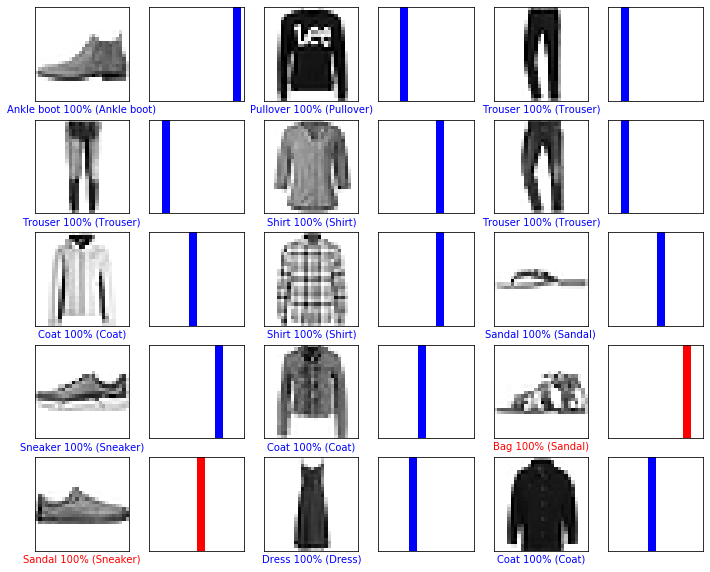

In [164]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()